## Homework 11

### 1) Design an observer for the oscillatory system $\dot x(t) = v(t),v(t) = -\omega_0^2x(t)$, using measurements of the velocity $v$. Place both observer poles at $s = -\omega_0.$

Linearization: $\begin{bmatrix} \dot x\\ \dot v \end{bmatrix} = \begin{bmatrix} 0&1\\-\omega_0^2 &0 \end{bmatrix} \begin{bmatrix} x\\ v \end{bmatrix} + Bu$

$y = Cx$ where $C = \begin{bmatrix} 0 &1 \end{bmatrix}$

observability $n = 2$.

$\mathcal{O} = [C^\top, A^\top C^\top] = \begin{bmatrix} 0&1\\ 1&0 \end{bmatrix}$ has rank 2.

The estimator of full state $x(t)$.

$$\dot {\hat x}  = A\hat x + Bu +K(y - \hat y),$$
where $\hat y = C\hat x +Du.$

The error between the actual state $x(t)$ and the estimated state $\hat x(t)$, $e(t) = x(t) - \hat x(t)$.

$$\dot e(t) = [A - KC]e(t).$$

$K = \begin{bmatrix}k_1\\k_2\end{bmatrix}$

Characteristic equation:

$det(sI - (A-KC)) = det\begin{bmatrix} s& k_1-1\\ \omega_0^2& s+k_2 \end{bmatrix} = s^2 + k_2s - \omega_0^2k_1 + \omega_0^2$

Given the doble eigenvalues are both $-\omega_0$, we can write the characteristic eqution as 
$$(s+\omega_0)^2 = s^2 +2\omega_0s+\omega_0^2.$$

By matching the parameters, we can determine that $k_2 = 2\omega_0, k_1 = 0.$ Therefore,
$$K = [0 ~~~~~2\omega_0]^\top$$

### 2) Consider the system $$\dot x =\begin{bmatrix}0 &1\\1& 0 \end{bmatrix}x+[0~~~ -1]^\top u, y = [1,0]x.$$ 

#### a)

First, we need to check controllability of this system.
$$ \mathcal{C} = \begin{bmatrix} B& AB\end{bmatrix}$$

In [25]:
import numpy as np
A = np.array([[0, 1], 
    [1, 0]])
B = np.array([[0],[-1]])
C = np.block([[B,A@B]])
print(C)

[[ 0 -1]
 [-1  0]]


In [26]:
rank_C = np.linalg.matrix_rank(C)
print(rank_C)

2


Hence the rank of controllability matrix is 2, (A, B) is controllable. Therefore, eigenvalues of A + BF can be assigned to arbitary.

Closed loop scheme:
$$\dot x = (A + BF) x $$

####  Assigning eigenvalues and eigenvectors

$[\lambda_j I - (A+BF)] v_j = 0$, which can be written as 
$$ [\lambda_j I - A, B)] \begin{bmatrix}M_j\\-D_j\end{bmatrix} = 0$$,
where $M_j = v_j$ and $D_j = -Fv_j$, and $\begin{bmatrix}M_j\\-D_j\end{bmatrix}$ is in null space of $[\lambda_j I - (A+BF)]$.

In [27]:
from scipy.linalg import null_space

eigen_lst = [complex(-0.5,-0.5),complex(-0.5,0.5)]
M = []
D = []
for i in range(2):
    space = np.block([eigen_lst[i]*np.identity(2)-A,B])
    ns = null_space(space)
    M.append(ns[:2,:])
    D.append(ns[2:,:])
    print('M'+str(i+1)+'=',ns[:2,:])
    print('-D'+str(i+1)+'=',ns[2:,:])

M1= [[-0.58504689-0.14613865j]
 [ 0.21945412+0.36559277j]]
-D1= [[0.65811621-0.14638479j]]
M2= [[-0.58504689+0.14613865j]
 [ 0.21945412-0.36559277j]]
-D2= [[0.65811621+0.14638479j]]


Since $\begin{bmatrix} M_j\\-D_j\end{bmatrix} $is a basis, there exists a nonzero $m \times 1$ vector $a_j$ s.t.
$$ \begin{bmatrix}M_j\\-D_j\end{bmatrix}a_j = \begin{bmatrix}v_j\\-Fv_j\end{bmatrix}$$

Combining the relations $-D_ja_j = -Fv_j$ and $M_ja_j = v_j$, we have
$$ FM_ja_j = D_ja_j$$

In [28]:
a1 = np.array([[-1]])
a2 = np.array([[1]])
a_lst = [a1,a2]
V = np.block([[M[i]@a_lst[i].T for i in range(2)]])##M_ja_j
print(V)

[[ 0.58504689+0.14613865j -0.58504689+0.14613865j]
 [-0.21945412-0.36559277j  0.21945412-0.36559277j]]


$$ W = D_ja_j$$
$$ FV = W$$

In [29]:
W = np.block([[-D[i]@a_lst[i].T for i in range(2)]])
print(W)

[[ 0.65811621-0.14638479j -0.65811621-0.14638479j]]


In [30]:
F = W@np.linalg.inv(V)
print(F)

[[1.5+0.0000000e+00j 1. -6.9388939e-18j]]


#### Plot $x(t)$ for the open- and closed-loop system

In [89]:
### Open-loop system
n = 1000
t = np.linspace(0,5,n)
def RHS(x, t):
    
    A = np.array([[0, 1], 
    [1, 0]])
    
    dxdt = A@x
    return dxdt

from scipy.integrate import odeint

x0 = np.array([-0.6,0.4])
'''line 176 of _odeintw.py, it checks to see whether there really are complex numbers, 
by checking if the initial condition is complex. Since in this case, our initial value of states are all real
I just make one of them 
'''
sol = odeint(RHS, x0,t)

print(sol)

[[ -0.6          0.4       ]
 [ -0.5980055    0.39700199]
 [ -0.59602598   0.39401392]
 ...
 [-14.69690224 -14.69009651]
 [-14.77061064 -14.76383888]
 [-14.84468904 -14.8379511 ]]


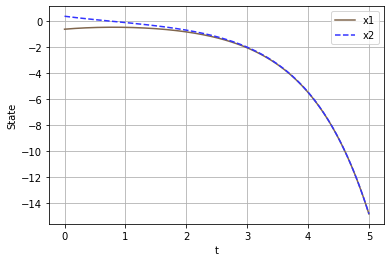

In [90]:
import matplotlib.pyplot as plt
import numpy as np
color1 = (0.5, 0.4, 0.3)
color2 = (0.2, 0.2, 1.0)
plt.plot(t, sol[:, 0], color=color1, label='x1')
plt.plot(t, sol[:, 1], '--', color=color2, linewidth=1.5, label='x2')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('State')
plt.show()

In [31]:
### Closed-loop system
n = 1000
t = np.linspace(0,10,n)
def RHS(x, t):
    
    A = np.array([[0, 1], 
    [1, 0]])
    B = np.array([[0],[-1]])
    
    dxdt = (A+B@F)@x
    return dxdt

from odeintw import odeintw

x0 = np.array([-0.6+0j,0.4])
'''line 176 of _odeintw.py, it checks to see whether there really are complex numbers, 
by checking if the initial condition is complex. Since in this case, our initial value of states are all real
I just make one of them 
'''
sol = odeintw(RHS, x0,t)

print(sol)

[[-6.00000000e-01+0.00000000e+00j  4.00000000e-01+0.00000000e+00j]
 [-5.96001028e-01+1.38289785e-22j  3.98994022e-01+2.76098475e-20j]
 [-5.92012174e-01+5.51276691e-22j  3.97978171e-01+5.48734341e-20j]
 ...
 [-2.42809932e-03-2.25299792e-19j -5.62991666e-04+7.49898224e-20j]
 [-2.43364606e-03-2.24547461e-19j -5.45278305e-04+7.53247489e-20j]
 [-2.43901624e-03-2.23791806e-19j -5.27714188e-04+7.56538036e-20j]]


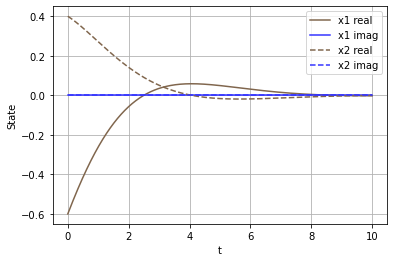

In [32]:
import matplotlib.pyplot as plt
import numpy as np
color1 = (0.5, 0.4, 0.3)
color2 = (0.2, 0.2, 1.0)
plt.plot(t, sol[:, 0].real, color=color1, label='x1 real')
plt.plot(t, sol[:, 0].imag, color=color2, label='x1 imag')
plt.plot(t, sol[:, 1].real, '--', color=color1, linewidth=1.5, label='x2 real')
plt.plot(t, sol[:, 1].imag, '--', color=color2, linewidth=1.5, label='x2 imag')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('State')
plt.show()

#### b)

Assume $K = [k_1,k_2]^\top$.

Characteristic equation:

$det(sI - (A-KC)) = det\begin{bmatrix} s + k_1& -1\\ k_2 -1 & s \end{bmatrix} = s^2 + k_1s + k_2 -1$

Given the eigenvalues are  $-\alpha ± j$, we can write the characteristic eqution as 
$$(s+\alpha +j)(s+\alpha -j) = s^2 +2\alpha s+\alpha^2 + 1.$$

By matching the parameters, we can determine that $k_2 = \alpha^2+2, k_1 = 2\alpha.$ Therefore,
$$K = [2\alpha~~~~~\alpha^2+2]^\top$$

#### c)

The original open-loop system is 
$$ \dot x  = Ax + Bu$$
$$  y = Cx $$
Estimator of states 
    $$ \dot{\hat x} = A\hat x +Bu + K(y-\hat y) = (A - KC)\hat x + KCx +Bu,$$
    where $\hat y = C\hat x$ 

The state equations of the compensated system are 
$$ \dot x = Ax +BF\hat x$$
$$\dot{\hat x} = KCx + (A - KC +BF)\hat x.$$
The output equation is still 
$$ y = Cx$$
State representation of then compensated closed-loop system:
$$\begin{bmatrix} \dot x \\\dot{\hat x}\end{bmatrix} = \begin{bmatrix} A & BF \\KC & A-KC+BF\end{bmatrix}\begin{bmatrix}x\\\hat x\end{bmatrix}$$
$$ y = Cx$$

#### d). For$ x(0) = [-0.6,0.4]^ \top $and $x(0) = [0,0]^\top$ plot $\hat x(t),x(t),y(t)$ and $u(t)$ of the closed-loop system obtained in (c) and comment on your results. Use $\alpha$ = 1,2,5, and 10 and comment on the effects on the system response.

In [38]:
'''alpha = 1
K = np.array([[2*alpha],[alpha**2+2]])
C = np.array([[1,0]])
big_matrix = np.block([[A,B@F],[K@C,A-K@C+B@F]])
print(big_matrix)
'''


[[ 0. +0.0000000e+00j  1. +0.0000000e+00j  0. +0.0000000e+00j
   0. +0.0000000e+00j]
 [ 1. +0.0000000e+00j  0. +0.0000000e+00j -1.5+0.0000000e+00j
  -1. +6.9388939e-18j]
 [ 2. +0.0000000e+00j  0. +0.0000000e+00j -2. +0.0000000e+00j
   1. +0.0000000e+00j]
 [ 3. +0.0000000e+00j  0. +0.0000000e+00j -3.5+0.0000000e+00j
  -1. +6.9388939e-18j]]


In [50]:
'''n = 2000
t = np.linspace(0,20,n)
def RHS(x, t):
    
    dxdt = big_matrix@x
    return dxdt
'''

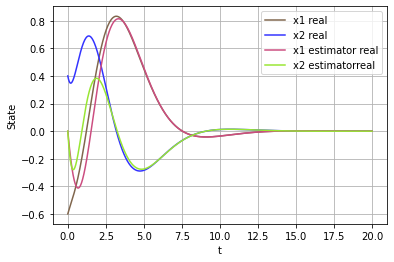

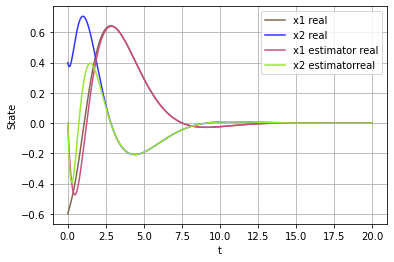

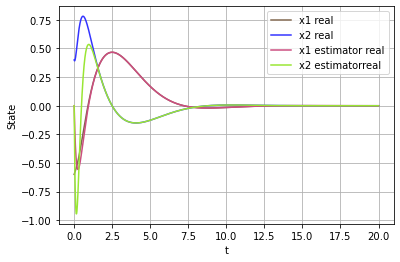

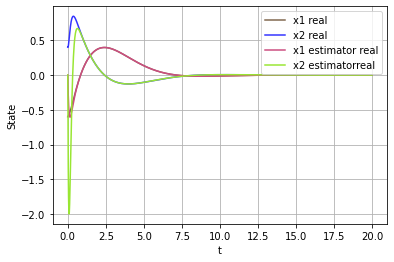

In [51]:
alpha = [1,2,5,10]
for i in alpha:
    K = np.array([[2*i],[i**2+2]])
    C = np.array([[1,0]])
    big_matrix = np.block([[A,B@F],[K@C,A-K@C+B@F]])
    x0 = np.array([-0.6+0j,0.4,0+0j,0])
    sol = odeintw(RHS, x0,t)
    color1 = (0.5, 0.4, 0.3)
    color2 = (0.2, 0.2, 1.0)
    color3 = (0.8, 0.3, 0.5)
    color4 = (0.6, 0.9, 0.2)
    plt.plot(t, sol[:, 0].real, color=color1, label='x1 real')
    plt.plot(t, sol[:, 1].real, color=color2, linewidth=1.5, label='x2 real')
    plt.plot(t, sol[:, 2].real, color=color3, label='x1 estimator real')
    plt.plot(t, sol[:, 3].real, color=color4, label='x2 estimatorreal')
   
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('State')
    plt.show()

The grater the magnitude of filter gain is, quicker the state estimators converge to the true states.

### 3) Consider the system
$$\Large \dot x = \begin{bmatrix} -0.0507 & -3.861 &0&-32.2\\ -0.00117 & -0.5164 &1&0\\-0.000129&1.4168&-0.4932&0\\0&0&1&0\end{bmatrix} x + \begin{pmatrix} 0 \\ -0.0717\\- 1 . 6 45\\0 \end{pmatrix} u.$$

$$\Large y = Cx$$
where $$\Large C = \begin{bmatrix}0&1&0&0\\0&0&1&0\end{bmatrix}$$

#### a)

Closed-loop system:

$$\dot x = (A + BF)x$$

####  Assigning eigenvalues and eigenvectors

$[\lambda_j I - (A+BF)] v_j = 0$, which can be written as 
$$ [\lambda_j I - A, B)] \begin{bmatrix}M_j\\-D_j\end{bmatrix} = 0$$,
where $M_j = v_j$ and $D_j = -Fv_j$, and $\begin{bmatrix}M_j\\-D_j\end{bmatrix}$ is in null space of $[\lambda_j I - (A+BF)]$.

In [91]:
import numpy as np
A = np.array([[-0.0507, -3.861, 0, -32.2], 
    [-0.00117 , -0.5164 ,1, 0],
    [-0.000129, 1.4168, -0.4932, 0],
    [0,0,1,0]])
    
B = np.array([[ 0], 
    [-0.0717],
    [-1.645],
    [0]])

In [92]:
from scipy.linalg import null_space

eigen_lst = [complex(-1.25,-2.265),complex(-1.25,2.265),complex(-0.01,0.095),complex(-0.01,-0.095)]
M = []
D = []
for i in range(4):
    space = np.block([eigen_lst[i]*np.identity(4)-A,B])
    ns = null_space(space)
    M.append(ns[:4,:])
    D.append(ns[4:,:])
    print('M'+str(i+1)+'=',ns[:4,:])
    print('-D'+str(i+1)+'=',ns[4:,:])

M1= [[-0.92594239+0.11062856j]
 [-0.05471319-0.04402889j]
 [-0.08159872+0.15054505j]
 [-0.03570835-0.05573252j]]
-D1= [[0.29187639+0.08102311j]]
M2= [[-0.92594239-0.11062856j]
 [-0.05471319+0.04402889j]
 [-0.08159872-0.15054505j]
 [-0.03570835+0.05573252j]]
-D2= [[0.29187639-0.08102311j]]
M3= [[ 3.53056653e-01+9.35594206e-01j]
 [-6.44428567e-04-1.36310312e-03j]
 [ 1.71858076e-04+2.47781944e-04j]
 [ 2.39131002e-03-2.06074922e-03j]]
-D3= [[0.00061889+0.00133009j]]
M4= [[ 3.53056653e-01-9.35594206e-01j]
 [-6.44428567e-04+1.36310312e-03j]
 [ 1.71858076e-04-2.47781944e-04j]
 [ 2.39131002e-03+2.06074922e-03j]]
-D4= [[0.00061889-0.00133009j]]


Since $\begin{bmatrix} M_j\\-D_j\end{bmatrix} $is a basis, there exists a nonzero $m \times 1$ vector $a_j$ s.t.
$$ \begin{bmatrix}M_j\\-D_j\end{bmatrix}a_j = \begin{bmatrix}v_j\\-Fv_j\end{bmatrix}$$

Combining the relations $-D_ja_j = -Fv_j$ and $M_ja_j = v_j$, we have
$$ FM_ja_j = D_ja_j$$

In [93]:
a1 = np.array([[1]])
a2 = np.array([[-1]])
a3 = np.array([[5]])
a4 = np.array([[-6]])
a_lst = [a1,a2,a3,a4]
V = np.block([[M[i]@a_lst[i] for i in range(4)]])##M_ja_j
print(V)

[[-9.25942388e-01+1.10628563e-01j  9.25942388e-01+1.10628563e-01j
   1.76528326e+00+4.67797103e+00j -2.11833992e+00+5.61356524e+00j]
 [-5.47131936e-02-4.40288885e-02j  5.47131936e-02-4.40288885e-02j
  -3.22214284e-03-6.81551562e-03j  3.86657140e-03-8.17861874e-03j]
 [-8.15987238e-02+1.50545055e-01j  8.15987238e-02+1.50545055e-01j
   8.59290381e-04+1.23890972e-03j -1.03114846e-03+1.48669166e-03j]
 [-3.57083466e-02-5.57325197e-02j  3.57083466e-02-5.57325197e-02j
   1.19565501e-02-1.03037461e-02j -1.43478601e-02-1.23644953e-02j]]


$$ W = D_ja_j$$
$$ FV = W$$

In [94]:
W = np.block([[-D[i]@a_lst[i] for i in range(4)]])
print(W)

[[-0.29187639-0.08102311j  0.29187639-0.08102311j -0.00309445-0.00665043j
   0.00371334-0.00798051j]]


In [95]:
F = W@np.linalg.inv(V)
print(F)

[[0.00465493-2.17382536e-17j 4.12568754+4.64905892e-16j
  0.70753082-1.07899800e-15j 0.11490429-7.32747196e-15j]]


$$u = Fx$$

#### b) Full-order state observer

Check observability

The observability matrix is:
$$\mathcal{O} = \begin{bmatrix}C^T &(CA)^T &(CA^2)^T &(CA^3)^T \\ \end{bmatrix}$$

In [96]:
A = np.array([[-0.0507, -3.861, 0, -32.2], 
    [-0.00117 , -0.5164 ,1, 0],
    [-0.000129, 1.4168, -0.4932, 0],
    [0,0,1,0]])
C = np.array([[0,1,0,0],[0,0,1,0]])
O = np.block([[C.T,(C@A).T,(C@A@A).T,(C@A@A@A).T]])
rank_O = np.linalg.matrix_rank(O)
print(rank_O)

4


Since the number of non-zero sigular value is 4, the rank of observability matrix $\mathcal{O}$ is 4. That implies observability matrix has full rank. Therefore, this system is observable.

####  Assigning eigenvalues and eigenvectors

$[\lambda_j I - (A-KC)]^\top v_j = 0$, which can be written as 
$$ [\lambda_j I - A^\top, C^\top)] \begin{bmatrix}M_j\\D_j\end{bmatrix} = 0$$,
where $M_j a_j= v_j$ and $D_j a_j = K^\top v_j$, and $\begin{bmatrix}M_j\\D_j\end{bmatrix}$ is in null space of $[\lambda_j I - (A-KC)]^\top$.

In [97]:
C = np.array([[0,1,0,0],[0,0,1,0]])

In [98]:
eigen_lst = [0,-0.421,-0.587,-1]
M = []
D = []
for i in range(4):
    space = np.block([eigen_lst[i]*np.identity(4)-A.T,C.T])
    ns = null_space(space)
    M.append(ns[:4,:])
    D.append(ns[4:,:])
    print('M'+str(i+1)+'=',ns[:4,:])
    print('D'+str(i+1)+'=',ns[4:,:])

M1= [[ 1.51767858e-18  1.62608420e-19]
 [-5.75691756e-02  1.72393290e-02]
 [ 5.22139035e-01 -1.56356705e-01]
 [ 3.60390470e-01  6.30209914e-01]]
D1= [[ 0.76949531 -0.23042857]
 [ 0.04530232  0.72456437]]
M2= [[-3.06125148e-05  1.98473674e-03]
 [-7.23083853e-02  6.16174771e-01]
 [ 5.67945710e-01  1.08709556e-01]
 [-2.34138474e-03  1.51801717e-01]]
D2= [[ 0.8116819   0.08757356]
 [-0.11565545  0.76012766]]
M3= [[-1.95821874e-04  1.43426897e-03]
 [-1.52719529e-01  6.47826970e-01]
 [ 5.71027738e-01  8.71387120e-02]
 [-1.07418473e-02  7.86771054e-02]]
D3= [[ 0.79900617  0.163657  ]
 [-0.10989897  0.73467769]]
M4= [[-2.56326851e-04  8.30518290e-04]
 [-2.75744354e-01  6.78597860e-01]
 [ 6.14649725e-01 -4.30114990e-02]
 [-8.25372460e-03  2.67426889e-02]]
D4= [[0.73847544 0.2640246 ]
 [0.0275064  0.68354232]]


Combining the relations $D_ja_j = K^\top v_j$ and $M_ja_j = v_j$, we have
$$ K^\top M_ja_j = D_ja_j$$

In [99]:
a1 = np.array([[1,0]])
a2 = np.array([[-1,1]])
a3 = np.array([[5,2]])
a4 = np.array([[-6,7]])
a_lst = [a1,a2,a3,a4]
V = np.block([[M[i]@a_lst[i].T for i in range(4)]])##M_ja_j
print(V)

[[ 1.51767858e-18  2.01534925e-03  1.88942857e-03  7.35158913e-03]
 [-5.75691756e-02  6.88483156e-01  5.32056294e-01  6.40465114e+00]
 [ 5.22139035e-01 -4.59236154e-01  3.02941611e+00 -3.98897885e+00]
 [ 3.60390470e-01  1.54143102e-01  1.03644974e-01  2.36721170e-01]]


In [100]:
W = np.block([[D[i]@a_lst[i].T for i in range(4)]])
print(W)

[[ 0.76949531 -0.72410834  4.32234484 -2.58268042]
 [ 0.04530232  0.87578311  0.9198605   4.61975783]]


In [101]:
K_T = W@np.linalg.inv(V)
print(K_T.T)

[[-3.42484395e+02  2.97207878e+02]
 [ 9.04452185e-01  4.02392248e-01]
 [ 1.47675452e+00  4.32478151e-02]
 [ 1.40105523e-01  1.27323955e-01]]


Therefore, the full-order state observer with eigenvalues
at 0, -0.421, -0.587, and - 1 is $K = \begin{bmatrix} -3.42484395e+02  &2.97207878e+02\\
 9.04452185e-01 & 4.02392248e-01\\
 1.47675452e+00 & 4.32478151e-02\\
 1.40105523e-01  &1.27323955e-01 \end{bmatrix}$

#### c). Let the system be compensated via the state feedback control law $u = F\hat x$ , where $\hat x$ is the output of the state estimator. Derive the state-space representation.

The original open-loop system is 
$$ \dot x  = Ax + Bu$$
$$  y = Cx $$
Estimator of states 
    $$ \dot{\hat x} = A\hat x +Bu + K(y-\hat y) = (A - KC)\hat x + KCx +Bu,$$
    where $\hat y = C\hat x$ 

The state equations of the compensated system are 
$$ \dot x = Ax +BF\hat x$$
$$\dot{\hat x} = KCx + (A - KC +BF)\hat x.$$
The output equation is still 
$$ y = Cx$$
State representation of then compensated closed-loop system:
$$\begin{bmatrix} \dot x \\\dot{\hat x}\end{bmatrix} = \begin{bmatrix} A & BF \\KC & A-KC+BF\end{bmatrix}\begin{bmatrix}x\\\hat x\end{bmatrix}$$
$$ y = Cx$$

#### d). Use the LQR formulation to determine a stabilizing linear state feedback control law u = Fx

minimize $$J(u) = \int_0^\infty x^\top Qx+u^\top Rudt$$
R = 1, and $Q = \begin{bmatrix} 100&0&0&0\\0&30&0&0\\0&0&50&0\\0&0&0&30 \end{bmatrix}$

Since we are studying the landing process of an aircraft, we care more about making the aircraft stop and have less constriants on control cost.

In [102]:
R = 1
Q = np.array([[100,0,0,0],[0,30,0,0],[0,0,50,0],[0,0,0,30]])
import scipy.linalg as sl

S = sl.solve_continuous_are(A,B,Q,R)
print(S)

[[  26.1433836   -12.66128987   -5.44700352 -111.04989199]
 [ -12.66128987   34.29927463    4.75874835   65.11435175]
 [  -5.44700352    4.75874835    7.23140704   48.67823665]
 [-111.04989199   65.11435175   48.67823665  820.50615902]]


In [103]:
control_law = -B.T@S
print(control_law)

[[-9.86813527 10.28739903 12.23686684 84.74439831]]


#### e). Assume that process noise $w$ and measurement noise $v$ are present and that both are uncorrelated, zero-mean Gaussian, stochastic processes with covariances $W = 10^{-4}$ and $ V = 10^{-2}$, respectively. Let $\mathrm{T} = [0, 1, 1, 0]^\top$ and design an optimal observer.

Optimal observer for the linear time-invariant system
$$\dot x = Ax + Bu + \mathrm(T) w, y = Cx + v$$
The covariances of each of w and v are
$$E(ww^\top) = W, E(vv^\top) = V$$
Then consider the estimator,
$$\dot{\hat x} = (A - KC)\hat x +Bu +Ky$$.
The error covariance $E[(x-\hat x)(x-\hat x)^\top]$ is minimized when the filter gain is given by 
$$K = S_eC^\top V^{-1}$$
where $S_e$ is the minimum error covariance and is given by the Riccati equation
$$ S_eA^\top + AS_e - S_eC^\top V^{-1}CS_e + \mathrm(TWT^\top) = 0,$$
 

In [104]:
T = np.array([[0],[1],[1],[0]])
W = 10**(-4)
V = 10**(-2)*np.identity(2)
Q = W*T@T.T
S_e = sl.solve_continuous_are(A.T,C.T,Q,V)
print(S_e)

[[ 6.54167819e+01 -4.67690801e-01 -5.21292032e-01 -8.08536649e-01]
 [-4.67690801e-01  6.29736475e-03  7.30779295e-03  9.89301371e-03]
 [-5.21292032e-01  7.30779295e-03  8.49704839e-03  1.14588625e-02]
 [-8.08536649e-01  9.89301371e-03  1.14588625e-02  1.68177755e-02]]


In [105]:
K = S_e@C.T@np.linalg.inv(V)
print(K)

[[-46.76908014 -52.12920322]
 [  0.62973648   0.73077929]
 [  0.73077929   0.84970484]
 [  0.98930137   1.14588625]]


#### f).  Design an optimal LQG observer-based dynamic controller and determine the eigenvalues of the closed-loop system. Discuss your answer in view of the results in (c).

Linear Quadratic Gaussian control design is optimal in the sense that the control law $u^*(t) = F^*\hat x(t)$ minimizes $E[\int_0^\infty (x^\top Qx + u^\top R u)dt].$
The optimal control law is given by
$$ u^*(t) = F^*\hat x(t) = -R^{-1}B^\top S_c^*\hat x(t),$$
where $S_c^* > 0$ is the solution of the algebraic Riccati equation
$$A^\top S_c + S_cA-S_cBR^{-1}B^\top S_c + Q = 0.$$

The closed-loop we drived in c)
$$\begin{bmatrix} \dot x \\\dot{\hat x}\end{bmatrix} = \begin{bmatrix} A & BF \\KC & A-KC+BF\end{bmatrix}\begin{bmatrix}x\\\hat x\end{bmatrix}$$
$$ y = Cx$$
which is equivalent to 
$$\begin{bmatrix} \dot x \\\dot e\end{bmatrix} = \begin{bmatrix} A + BF & -BF\\0& A-KC\end{bmatrix}\begin{bmatrix}x\\E\end{bmatrix}$$
$$ y = Cx$$

The closed-loop eigenvalues are the roots of the polynomial
$$\left|\lambda I_n - (A+BF)\right|\left|\lambda I_n - (A-KC)\right|$$

In [109]:
big_matrix = np.block([[A+B@F,-B@F],[np.zeros((4,4)),A-K@C]])
eigenvalue, eigenvector = np.linalg.eig(big_matrix)
print(eigenvalue)

[-1.25      -2.265j      -1.25      +2.265j      -0.01      -0.095j
 -0.01      +0.095j      -0.04640264+0.20435866j -0.04640264-0.20435866j
 -0.74357692+0.j         -1.70335913+0.j        ]


The real parts of all eigenvalues are negative, so the closed-loop system is stable.

### 4). Consider the discrete-time system $x(k+1) =Ax(k) + Bu(k) +\omega_k, y(k) = C(k)x(k) + v_k,$ where $u≡0$.
$$ A = \begin{bmatrix} 1 & 0.1\\0&1 \end{bmatrix}, C = [1,0]$$

Let's assume that the covariance matrices of $w$ and $v$ are both $0.01 I$.

In [70]:
import numpy as np
numsteps = 20

x = np.zeros((2,numsteps))
x[:,0] = [1,1]

y = np.zeros(numsteps)
y[0] = x[0,0] + np.random.normal(0,.01)

F = np.eye(2) + np.array([[0,0.1],[0,0]])

for k in range(numsteps-1):
    x[:,k+1] = F@x[:,k] + np.random.normal(0,.01,2)
    y[k+1] = x[0,k+1] + np.random.normal(0,.01)

Our updates for our state estimates are given by the following equations:

$$
P_k = ( (Q_{k-1} + F_{k-1}P_{k-1}F_{k-1}^T)^{-1} + H_k^T R_k^{-1} H_k )^{-1}
$$

$$
\hat x_k = F_{k-1}\hat x_{k-1} - P_K H_k^T R_k^{-1} ( H_k (F_{k-1} \hat x_{k-1}) - y_k)
$$

In [73]:
import numpy.linalg as la

hatX = np.zeros((2,numsteps))
P = np.eye(2)

Q = np.eye(2)*0.01
R = 0.01

H = np.array([[1,0]])

for k in range(numsteps-1):
    P = la.inv( la.inv(Q + F@P@F.T) + H.T@H/R)
    hatX[:,k+1] = F@hatX[:,k] - P@H.T@(H@(F@hatX[:,k])-y[k+1])/R

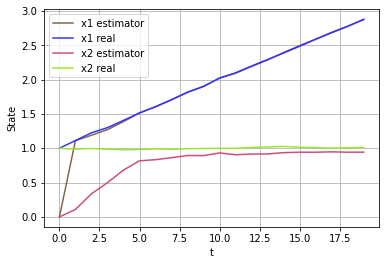

In [83]:
plt.plot(range(numsteps), hatX[0,:], color=color1, label='x1 estimator')
plt.plot(range(numsteps), x[0,:], color=color2, label='x1 real')
plt.plot(range(numsteps), hatX[1,:], color=color3, label='x2 estimator')
plt.plot(range(numsteps), x[1,:], color=color4, label='x2 real')
   
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('State')
plt.show()